In [ ]:
https://datahack.analyticsvidhya.com/contest/job-a-thon-november-2021/#ProblemStatement

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns

# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
#pd.options.display.max_columns = None

# display all rows of the dataframe
#pd.options.display.max_rows = 100
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score ,roc_auc_score

# import function to perform feature selection
from sklearn.feature_selection import RFE



# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import the XGBoost function for classification
from xgboost import XGBClassifier


In [213]:
train = pd.read_csv('train_MpHjUjU.csv')
test = pd.read_csv('test_hXY9mYw.csv')

In [214]:
print(train.shape , test.shape)

(19104, 13) (741, 1)


In [215]:
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [216]:
test.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


#### null value checking 

In [217]:
train.isnull().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [218]:
# we need emp_id so have stored it 

emp_train = train.Emp_ID

In [219]:
train = train.drop(['Dateofjoining' ,'LastWorkingDate', 'MMM-YY' , 'Emp_ID' , 'City'] , axis = 1)

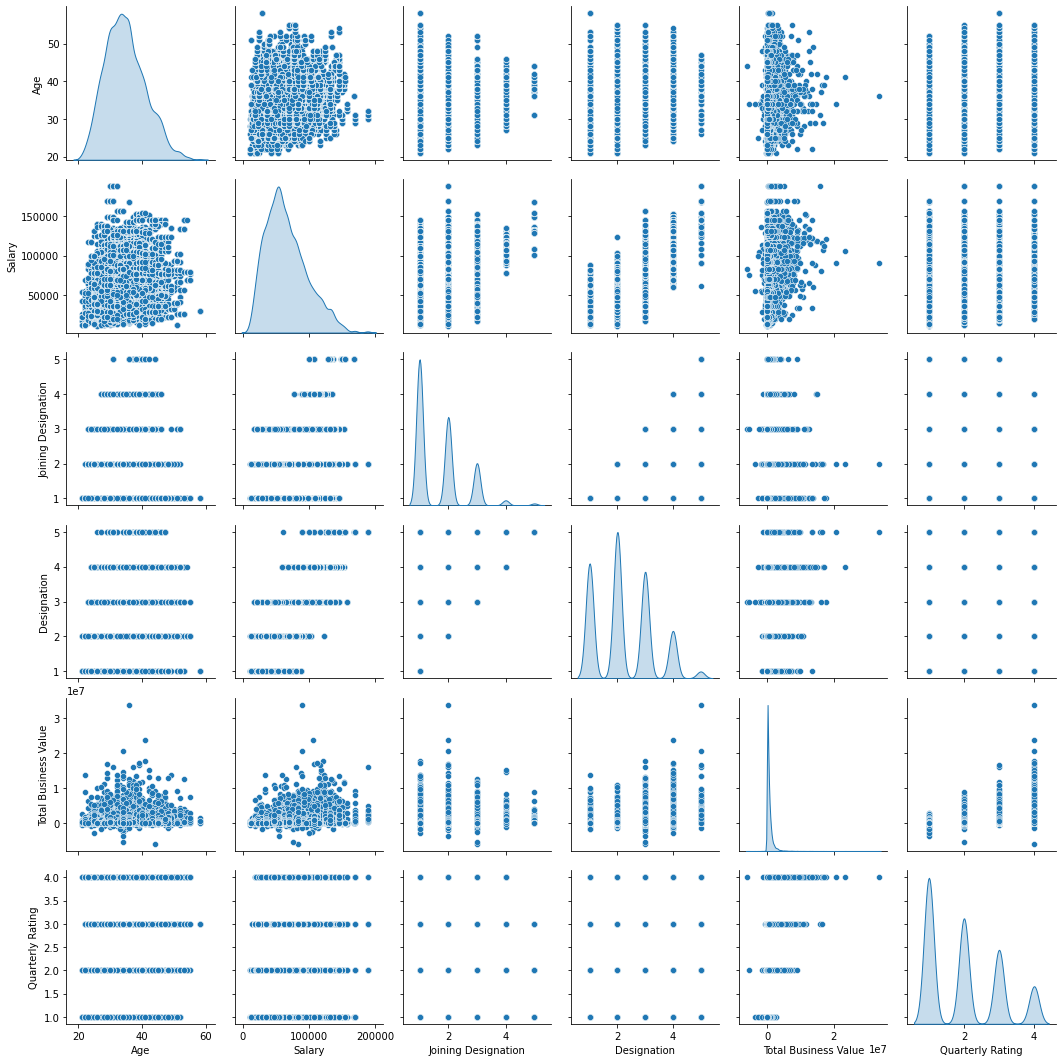

In [220]:
sns.pairplot(train,diag_kind='kde')

In [221]:
train['Quarterly Rating'].value_counts()

1    7679
2    5553
3    3895
4    1977
Name: Quarterly Rating, dtype: int64

In [222]:
train.head()

,Age,Gender,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,28,Male,Master,57387,1,1,2381060,2
1,28,Male,Master,57387,1,1,-665480,2
2,28,Male,Master,57387,1,1,0,2
3,31,Male,Master,67016,2,2,0,1
4,31,Male,Master,67016,2,2,0,1


In [223]:
# gender colum encoding

train['Gender'] = np.where(train['Gender']=='Male' ,1,0)


In [224]:
train['Gender'].value_counts()

1    11103
0     8001
Name: Gender, dtype: int64

In [225]:
#Education_Level encoding

train['Education_Level'].value_counts()

Bachelor    6864
Master      6327
College     5913
Name: Education_Level, dtype: int64

In [226]:
#Education_Level encoding

def edu(x):
    if x =='Bachelor':
        return 1
    elif x =='Master':
        return 2
    elif x =='College':
        return 0

In [227]:
train['Education_Level'] = train['Education_Level'].map(edu)

In [228]:
train['Education_Level'].value_counts()

1    6864
2    6327
0    5913
Name: Education_Level, dtype: int64

In [229]:
sc = StandardScaler()

train_sc = pd.DataFrame(sc.fit_transform(train) , columns = train.columns)
    

In [230]:
train_sc.head()

,Age,Gender,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,-1.061615,0.848891,1.222688,-0.267358,-0.825051,-1.220348,1.603674,-0.008812
1,-1.061615,0.848891,1.222688,-0.267358,-0.825051,-1.220348,-1.096482,-0.008812
2,-1.061615,0.848891,1.222688,-0.267358,-0.825051,-1.220348,-0.506666,-0.008812
3,-0.582711,0.848891,1.222688,0.044122,0.369747,-0.246150,-0.506666,-0.999102
4,-0.582711,0.848891,1.222688,0.044122,0.369747,-0.246150,-0.506666,-0.999102


In [231]:
df= train_sc.copy()

## Kmeans

In [232]:
from sklearn.cluster import KMeans

In [240]:
kmeans2 = KMeans(n_clusters=2)

# Training the model:
clusters = kmeans2.fit_predict(df)

# Adding a label feature with the predicted class values:
df_k = df.copy(deep=True)
df_k['label'] = clusters

In [241]:
df_k['label'].value_counts()

0    11990
1     7114
Name: label, dtype: int64

In [242]:
df1 =pd.DataFrame({'Emp_ID':emp_train , "Target":df_k['label']}) 



In [280]:
#df1.to_csv("id_and_lab.csv" , index = False)

In [283]:
df1.Emp_ID.nunique()

2381

In [273]:
df1.reset_index(drop = True)

,Emp_ID,Target
0,1,0
1,1,0
2,1,0
3,2,0
4,2,0
...,...,...
19099,2788,0
19100,2788,0
19101,2788,0
19102,2788,0


In [274]:
df1.tail()

,Emp_ID,Target
19099,2788,0
19100,2788,0
19101,2788,0
19102,2788,0
19103,2788,0


In [275]:
df1.head()

,Emp_ID,Target
0,1,0
1,1,0
2,1,0
3,2,0
4,2,0


In [245]:
df1.Target

0        0
1        0
2        0
3        0
4        0
        ..
19099    0
19100    0
19101    0
19102    0
19103    0
Name: Target, Length: 19104, dtype: int32

In [276]:
df1.Target.value_counts()

0    11990
1     7114
Name: Target, dtype: int64

In [277]:
df_new = df1.drop_duplicates(subset = ['Emp_ID'],keep = 'first')

In [364]:
df_new = pd.pivot_table(data = df1 , index ='Emp_ID' , values= 'Target' , aggfunc=lambda x: x.mode().iat[0])

In [281]:
#df_new.to_csv("id_and_lab_non_dup.csv" , index = False)

In [319]:
df_new.index= df_new['Emp_ID']
df_new = df_new.drop(['Emp_ID'], axis = 1)


In [320]:
df_new

,Target
Emp_ID,
1,0
2,0
4,0
5,0
6,1
...,...
2784,1
2785,0
2786,0


In [265]:
df_id_ls = df_new['Emp_ID']

In [365]:
count = 0
lst_id = []
lst_lab =[]
for i in test.Emp_ID:
    for j in df_new.index: #emp_train , df_new.Emp_ID
        if i==j:
            lst_id.append(i)
            lst_lab.append(df_new['Target'][j])
        count +=1
        
print(count)

1764321


In [338]:
print(len(lst_id))
print(len(lst_lab))

741
741


In [366]:
# sumbmission file

df2 =pd.DataFrame({'Emp_ID':lst_id , "Target":lst_lab}) 
df2.to_csv("Basemodel_pivot.csv" , index = False)

### agglomative 

In [340]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(df)

df_agg = df.copy(deep=True)
df_agg['label'] = cluster2

In [341]:
df10 =pd.DataFrame({'Emp_ID':emp_train , "Target":df_agg['label']}) 

In [343]:
df10.reset_index(drop = True)

,Emp_ID,Target
0,1,0
1,1,1
2,1,1
3,2,0
4,2,0
...,...,...
19099,2788,0
19100,2788,0
19101,2788,0
19102,2788,0


In [346]:
df_new10 = df10.drop_duplicates(subset = ['Emp_ID'],keep = 'last')

In [356]:
from scipy.stats import mode

In [358]:
df_new10 = pd.pivot_table(data = df10 , index ='Emp_ID' , values= 'Target' , aggfunc=lambda x: x.mode().iat[0])

Int64Index([   1,    2,    4,    5,    6,    8,   11,   12,   13,   14,
            ...
            2776, 2778, 2779, 2781, 2782, 2784, 2785, 2786, 2787, 2788],
           dtype='int64', name='Emp_ID', length=2381)

In [347]:
df_new10.index= df_new10['Emp_ID']
df_new10 = df_new10.drop(['Emp_ID'], axis = 1)

In [360]:
count = 0
lst_id = []
lst_lab =[]
for i in test.Emp_ID:
    for j in df_new10.index: #emp_train , df_new.Emp_ID
        if i==j:
            lst_id.append(i)
            lst_lab.append(df_new10['Target'][j])
        count +=1
        
print(count)

1764321


In [361]:
print(len(lst_id) , len(lst_lab))

741 741


In [362]:
# sumbmission file

df2 =pd.DataFrame({'Emp_ID':lst_id , "Target":lst_lab}) 
df2.to_csv("agglo_pivot.csv" , index = False)